In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
from pyspark.sql.types import DateType
from pyspark.sql.window import Window
import pyspark.sql.functions as F

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [9]:
df_congestion = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/user/city-congestion.csv")
df_counties = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/user/us-counties.csv")

In [10]:
df_congestion.show(10)

+---------+-------------------+------------------+
|city_name|          date_time|percent_congestion|
+---------+-------------------+------------------+
|  Atlanta|2020-01-31 19:00:00| 51.69328250156718|
|  Atlanta|2020-02-01 12:00:00|  48.0467737598111|
|  Atlanta|2020-02-02 16:00:00|42.245800511516336|
|  Atlanta|2020-02-10 05:00:00| 18.93750566915324|
|  Atlanta|2020-02-10 21:00:00|30.681945713196757|
|  Atlanta|2020-02-13 15:00:00| 60.20372831554093|
|  Atlanta|2020-02-14 15:00:00| 84.17972302964475|
|  Atlanta|2020-02-15 16:00:00|  60.9588673853432|
|  Atlanta|2020-02-16 12:00:00|41.171562735182235|
|  Atlanta|2020-02-19 15:00:00|54.816064996460014|
+---------+-------------------+------------------+
only showing top 10 rows



In [12]:
df_congestion = df_congestion.select(df_congestion['date_time'].cast(DateType()).alias('date'), col('city_name').alias('county'), 'percent_congestion')
df_congestion.show(10)

+----------+-------+------------------+
|      date| county|percent_congestion|
+----------+-------+------------------+
|2020-01-31|Atlanta| 51.69328250156718|
|2020-02-01|Atlanta|  48.0467737598111|
|2020-02-02|Atlanta|42.245800511516336|
|2020-02-10|Atlanta| 18.93750566915324|
|2020-02-10|Atlanta|30.681945713196757|
|2020-02-13|Atlanta| 60.20372831554093|
|2020-02-14|Atlanta| 84.17972302964475|
|2020-02-15|Atlanta|  60.9588673853432|
|2020-02-16|Atlanta|41.171562735182235|
|2020-02-19|Atlanta|54.816064996460014|
+----------+-------+------------------+
only showing top 10 rows



In [13]:
df_counties.show(10)

+-------------------+-----------+----------+----------------+---------------+------+
|               date|     county|state_name|county_fips_code|confirmed_cases|deaths|
+-------------------+-----------+----------+----------------+---------------+------+
|2020-08-02 00:00:00|     Joplin|  Missouri|            null|            448|    20|
|2020-08-02 00:00:00|Kansas City|  Missouri|            null|           5929|    69|
|2020-08-03 00:00:00|     Joplin|  Missouri|            null|            453|    21|
|2020-08-03 00:00:00|Kansas City|  Missouri|            null|           6027|    69|
|2020-08-04 00:00:00|     Joplin|  Missouri|            null|            467|    21|
|2020-08-04 00:00:00|Kansas City|  Missouri|            null|           6137|    69|
|2020-08-05 00:00:00|     Joplin|  Missouri|            null|            477|    21|
|2020-08-05 00:00:00|Kansas City|  Missouri|            null|           6268|    69|
|2020-08-06 00:00:00|     Joplin|  Missouri|            null|    

In [14]:
df_counties = df_counties.select(df_counties['date'].cast(DateType()).alias('date'), 'county', 'confirmed_cases', 'deaths')

In [15]:
df_counties.show(10)

+----------+-----------+---------------+------+
|      date|     county|confirmed_cases|deaths|
+----------+-----------+---------------+------+
|2020-08-02|     Joplin|            448|    20|
|2020-08-02|Kansas City|           5929|    69|
|2020-08-03|     Joplin|            453|    21|
|2020-08-03|Kansas City|           6027|    69|
|2020-08-04|     Joplin|            467|    21|
|2020-08-04|Kansas City|           6137|    69|
|2020-08-05|     Joplin|            477|    21|
|2020-08-05|Kansas City|           6268|    69|
|2020-08-06|     Joplin|            482|    21|
|2020-08-06|Kansas City|           6365|    74|
+----------+-----------+---------------+------+
only showing top 10 rows



In [27]:
df_congestion_avg = df_congestion.groupBy('date', 'county').agg(F.avg('percent_congestion').alias('percent_congestion'))

In [28]:
df_congestion_avg.show(10)

+----------+-----------+------------------+
|      date|     county|percent_congestion|
+----------+-----------+------------------+
|2020-07-04|    Atlanta|18.084302786733826|
|2020-02-08|    Atlanta| 35.59063947364009|
|2020-06-15|    Chicago|30.633469816861066|
|2020-11-25|    Chicago|32.578857281818564|
|2020-09-12|    Chicago| 32.30277522495887|
|2020-05-05|    Seattle|27.649614648201155|
|2020-06-21|   New York|29.305136635146265|
|2020-05-14| Washington| 22.90745395226429|
|2020-05-17| Washington|22.474996720731358|
|2020-02-09|Los Angeles|27.548569615354555|
+----------+-----------+------------------+
only showing top 10 rows



In [29]:
df_congestion_joined = df_congestion_avg.join(df_counties, ['date', 'county'])
df_congestion_joined.show(10)

+----------+----------+------------------+---------------+------+
|      date|    county|percent_congestion|confirmed_cases|deaths|
+----------+----------+------------------+---------------+------+
|2020-08-03|Washington|28.132140015493686|            315|    11|
|2020-08-04|Washington| 26.15494454876001|            319|    12|
|2020-08-05|Washington| 30.01912285077339|            320|    12|
|2020-08-06|Washington| 27.25863282123638|            326|    12|
|2020-08-07|Washington|30.250069748241856|            333|    12|
|2020-08-08|Washington|28.815583637950088|            393|    12|
|2020-08-09|Washington| 26.55341393865181|            398|    12|
|2020-08-10|Washington|27.475701598855693|            450|    12|
|2020-08-11|Washington|28.181390175001926|            453|    12|
|2020-08-12|Washington| 27.83645301277453|            459|    13|
+----------+----------+------------------+---------------+------+
only showing top 10 rows



In [30]:
df_congestion_joined.count()

8325

In [37]:
df_congestion_joined.groupBy('county').count().show()

+-------------+-----+
|       county|count|
+-------------+-----+
|  Los Angeles|  302|
|San Francisco|  300|
|   Washington| 7723|
+-------------+-----+



In [38]:
df_LA = df_congestion_joined.filter(col('county')=='Los Angeles')
df_LA.show(10)

+----------+-----------+------------------+---------------+------+
|      date|     county|percent_congestion|confirmed_cases|deaths|
+----------+-----------+------------------+---------------+------+
|2020-08-03|Los Angeles|27.804815484507774|         193788|  4701|
|2020-08-04|Los Angeles|28.402508517888588|         195614|  4758|
|2020-08-05|Los Angeles|28.252324407332022|         197912|  4825|
|2020-08-06|Los Angeles|28.288559109229084|         201106|  4869|
|2020-08-07|Los Angeles|29.642204758941848|         204167|  4918|
|2020-08-08|Los Angeles| 26.12467141251256|         206761|  4967|
|2020-08-09|Los Angeles|21.914075957454617|         208528|  4977|
|2020-08-10|Los Angeles|27.363645054997324|         210424|  4996|
|2020-08-11|Los Angeles| 27.92081534875044|         211808|  5057|
|2020-08-12|Los Angeles| 28.25565018995142|         214197|  5109|
+----------+-----------+------------------+---------------+------+
only showing top 10 rows



In [42]:
window = Window.partitionBy('county').orderBy('date')
df_LA_cl = df_LA.withColumn('confirmed_last', lag('confirmed_cases', 1).over(window))
df_LA_nc = df_LA_cl.withColumn('new_confirmed', df_LA_cl['confirmed_cases'] - df_LA_cl['confirmed_last'])
df_LA_nc.show(10)

+----------+-----------+------------------+---------------+------+--------------+-------------+
|      date|     county|percent_congestion|confirmed_cases|deaths|confirmed_last|new_confirmed|
+----------+-----------+------------------+---------------+------+--------------+-------------+
|2020-01-31|Los Angeles| 52.17338334838185|              1|     0|          null|         null|
|2020-02-01|Los Angeles|37.697537741937886|              1|     0|             1|            0|
|2020-02-02|Los Angeles| 26.58507333255318|              1|     0|             1|            0|
|2020-02-03|Los Angeles|  43.7632359332755|              1|     0|             1|            0|
|2020-02-04|Los Angeles| 46.41091893846731|              1|     0|             1|            0|
|2020-02-05|Los Angeles|47.328393423021026|              1|     0|             1|            0|
|2020-02-06|Los Angeles| 49.01281144396438|              1|     0|             1|            0|
|2020-02-07|Los Angeles| 49.741093398183

In [43]:
df_LA_dl = df_LA_nc.withColumn('deaths_last', lag('deaths', 1).over(window))
df_LA_nd = df_LA_dl.withColumn('new_deaths', df_LA_dl['deaths'] - df_LA_dl['deaths_last'])
df_LA_nd.show(10)

+----------+-----------+------------------+---------------+------+--------------+-------------+-----------+----------+
|      date|     county|percent_congestion|confirmed_cases|deaths|confirmed_last|new_confirmed|deaths_last|new_deaths|
+----------+-----------+------------------+---------------+------+--------------+-------------+-----------+----------+
|2020-01-31|Los Angeles| 52.17338334838185|              1|     0|          null|         null|       null|      null|
|2020-02-01|Los Angeles|37.697537741937886|              1|     0|             1|            0|          0|         0|
|2020-02-02|Los Angeles| 26.58507333255318|              1|     0|             1|            0|          0|         0|
|2020-02-03|Los Angeles|  43.7632359332755|              1|     0|             1|            0|          0|         0|
|2020-02-04|Los Angeles| 46.41091893846731|              1|     0|             1|            0|          0|         0|
|2020-02-05|Los Angeles|47.328393423021026|     

In [44]:
df_LA_final = df_LA_nd.select('date', 'county', 'percent_congestion', 'new_confirmed', 'new_deaths')
df_LA_final.show(10)

+----------+-----------+------------------+-------------+----------+
|      date|     county|percent_congestion|new_confirmed|new_deaths|
+----------+-----------+------------------+-------------+----------+
|2020-01-31|Los Angeles| 52.17338334838185|         null|      null|
|2020-02-01|Los Angeles|37.697537741937886|            0|         0|
|2020-02-02|Los Angeles| 26.58507333255318|            0|         0|
|2020-02-03|Los Angeles|  43.7632359332755|            0|         0|
|2020-02-04|Los Angeles| 46.41091893846731|            0|         0|
|2020-02-05|Los Angeles|47.328393423021026|            0|         0|
|2020-02-06|Los Angeles| 49.01281144396438|            0|         0|
|2020-02-07|Los Angeles| 49.74109339818395|            0|         0|
|2020-02-08|Los Angeles| 36.49658568867804|            0|         0|
|2020-02-09|Los Angeles|27.548569615354555|            0|         0|
+----------+-----------+------------------+-------------+----------+
only showing top 10 rows



In [45]:
df_LA_pd = df_LA_final.toPandas()

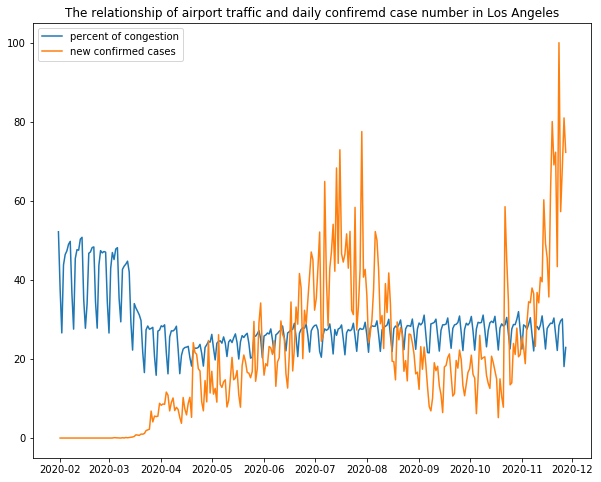

In [48]:
df = df_LA_pd
plt.plot(df['date'], df['percent_congestion'], label='percent of congestion')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['county'][0]))
plt.show()

In [49]:
df_SF = df_congestion_joined.filter(col('county')=='San Francisco')
df_SF_cl = df_SF.withColumn('confirmed_last', lag('confirmed_cases', 1).over(window))
df_SF_nc = df_SF_cl.withColumn('new_confirmed', df_SF_cl['confirmed_cases'] - df_SF_cl['confirmed_last'])
df_SF_dl = df_SF_nc.withColumn('deaths_last', lag('deaths', 1).over(window))
df_SF_nd = df_SF_dl.withColumn('new_deaths', df_SF_dl['deaths'] - df_SF_dl['deaths_last'])
df_SF_nd.show(10)

+----------+-------------+------------------+---------------+------+--------------+-------------+-----------+----------+
|      date|       county|percent_congestion|confirmed_cases|deaths|confirmed_last|new_confirmed|deaths_last|new_deaths|
+----------+-------------+------------------+---------------+------+--------------+-------------+-----------+----------+
|2020-02-02|San Francisco|  37.4148642895962|              2|     0|          null|         null|       null|      null|
|2020-02-03|San Francisco| 46.65840238951818|              2|     0|             2|            0|          0|         0|
|2020-02-04|San Francisco|52.017457082745885|              2|     0|             2|            0|          0|         0|
|2020-02-05|San Francisco|52.509664370474916|              2|     0|             2|            0|          0|         0|
|2020-02-06|San Francisco| 53.28176790903106|              2|     0|             2|            0|          0|         0|
|2020-02-07|San Francisco| 54.60

In [50]:
df_SF_final = df_SF_nd.select('date', 'county', 'percent_congestion', 'new_confirmed', 'new_deaths')
df_SF_final.show(10)

+----------+-------------+------------------+-------------+----------+
|      date|       county|percent_congestion|new_confirmed|new_deaths|
+----------+-------------+------------------+-------------+----------+
|2020-02-02|San Francisco|  37.4148642895962|         null|      null|
|2020-02-03|San Francisco| 46.65840238951818|            0|         0|
|2020-02-04|San Francisco|52.017457082745885|            0|         0|
|2020-02-05|San Francisco|52.509664370474916|            0|         0|
|2020-02-06|San Francisco| 53.28176790903106|            0|         0|
|2020-02-07|San Francisco| 54.60676791348533|            0|         0|
|2020-02-08|San Francisco| 46.94636015995619|            0|         0|
|2020-02-09|San Francisco| 38.13624770307343|            0|         0|
|2020-02-10|San Francisco|48.181220808379514|            0|         0|
|2020-02-11|San Francisco|50.724946658998505|            0|         0|
+----------+-------------+------------------+-------------+----------+
only s

In [51]:
df_SF_pd = df_SF_final.toPandas()

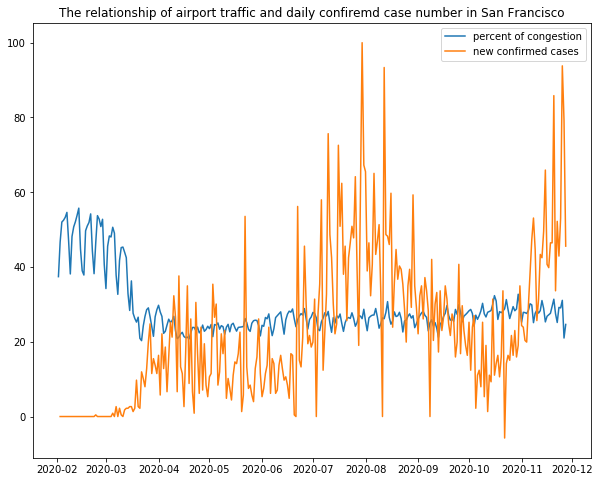

In [52]:
df = df_SF_pd
plt.plot(df['date'], df['percent_congestion'], label='percent of congestion')
plt.plot(df['date'], 100*df['new_confirmed']/df['new_confirmed'].max(), label='new confirmed cases')
plt.legend()
plt.title('The relationship of airport traffic and daily confiremd case number in {}'.format(df['county'][0]))
plt.show()